In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [73]:
data = pd.read_csv('Summary of Weather.csv', low_memory=False)

In [74]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
data1 = pd.read_csv('Weather Station Locations.csv', low_memory=False)

In [76]:
data1.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [77]:
# Check for missing values in the weather dataset
missing_data = data.isnull().sum()
print(missing_data)

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64


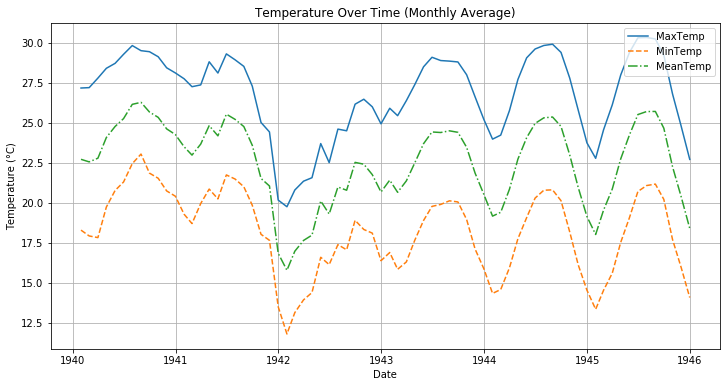

In [78]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Resample the data to reduce the number of data points
data_resampled = data.resample('M', on='Date').mean()  # Resample to monthly average

# Data Visualization with the resampled data
plt.figure(figsize=(12, 6))

# Plot MaxTemp, MinTemp, and MeanTemp
plt.plot(data_resampled.index, data_resampled['MaxTemp'], label='Max Temp', linestyle='-')
plt.plot(data_resampled.index, data_resampled['MinTemp'], label='Min Temp', linestyle='--')
plt.plot(data_resampled.index, data_resampled['MeanTemp'], label='Mean Temp', linestyle='-.')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time (Monthly Average)')
plt.legend(['MaxTemp', 'MinTemp', 'MeanTemp'], loc='upper right')
plt.grid(True)

plt.show()

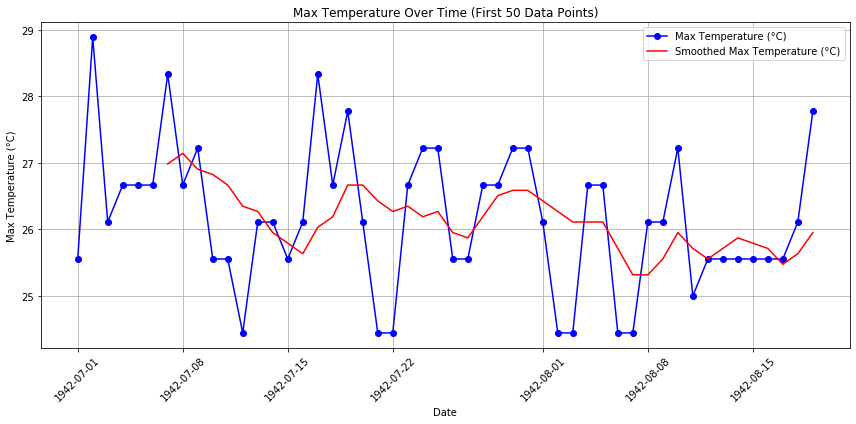

In [79]:
# Select the first 50 data points from your dataset
data_subset = data.iloc[:50]

# Calculate a rolling average to smooth the plot (e.g., over a window of 7 days)
rolling_window = 7
smoothed_max_temp = data_subset['MaxTemp'].rolling(rolling_window).mean()

plt.figure(figsize=(12, 6))

# Plot the max temperature over time for the first 50 data points
plt.plot(data_subset['Date'], data_subset['MaxTemp'], linestyle='-', marker='o', color='b', label='Max Temperature (°C)')

# Plot the smoothed max temperature
plt.plot(data_subset['Date'], smoothed_max_temp, color='r', label='Smoothed Max Temperature (°C)')

plt.title('Max Temperature Over Time (First 50 Data Points)')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')

plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\dilip\anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


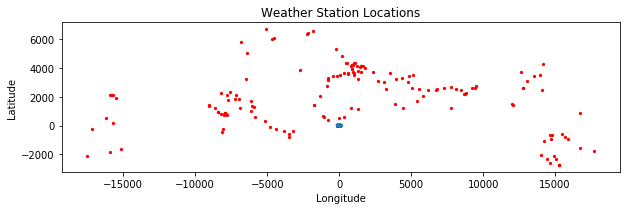

In [91]:
# Function to convert latitude and longitude values
def convert_lat_lon(value):
    value_str = str(value)  # Convert to string
    direction = value_str[-1]
    numeric_value = float(value_str[:-1])
    
    if direction == 'S' or direction == 'W':
        numeric_value = -numeric_value
    
    return numeric_value

# Apply the conversion function to the 'LAT' and 'LON' columns
data1['LAT'] = data1['LAT'].apply(convert_lat_lon)
data1['LON'] = data1['LON'].apply(convert_lat_lon)

# Create a GeoDataFrame from the latitude and longitude columns
gdf = gpd.GeoDataFrame(data1, 
                       geometry=gpd.points_from_xy(data1['LON'], data1['LAT']))

# Create a map with station markers
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.boundary.plot(figsize=(10, 6))
gdf.plot(ax=ax, color='red', marker='o', markersize=5)

# Customize the plot as needed
plt.title('Weather Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the map
plt.show()


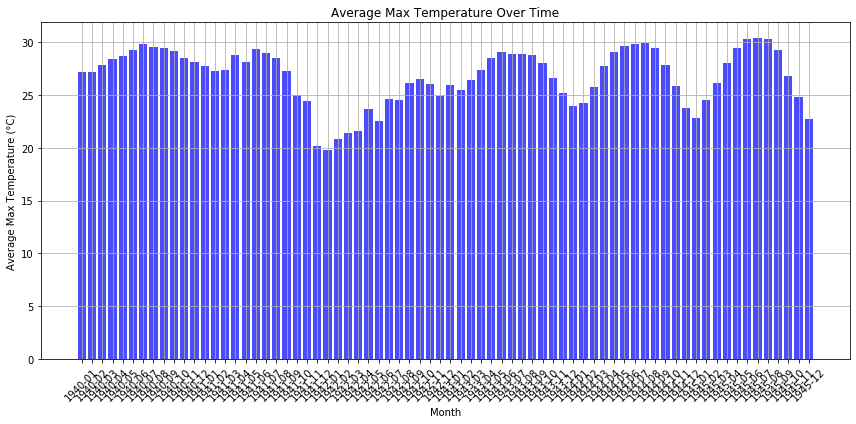

In [81]:
# Example: Aggregating by month
monthly_data = data.groupby(data['Date'].dt.strftime('%Y-%m'))['MaxTemp'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Create a bar plot for average max temperature over time
plt.bar(monthly_data['Date'], monthly_data['MaxTemp'], color='b', alpha=0.7)
plt.title('Average Max Temperature Over Time')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [82]:
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) // nHistogramPerRow  # Use integer division
    plt.figure(num=None, figsize=(6 * nHistogramPerRow, 8 * nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i + 1)
        df.iloc[:, i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

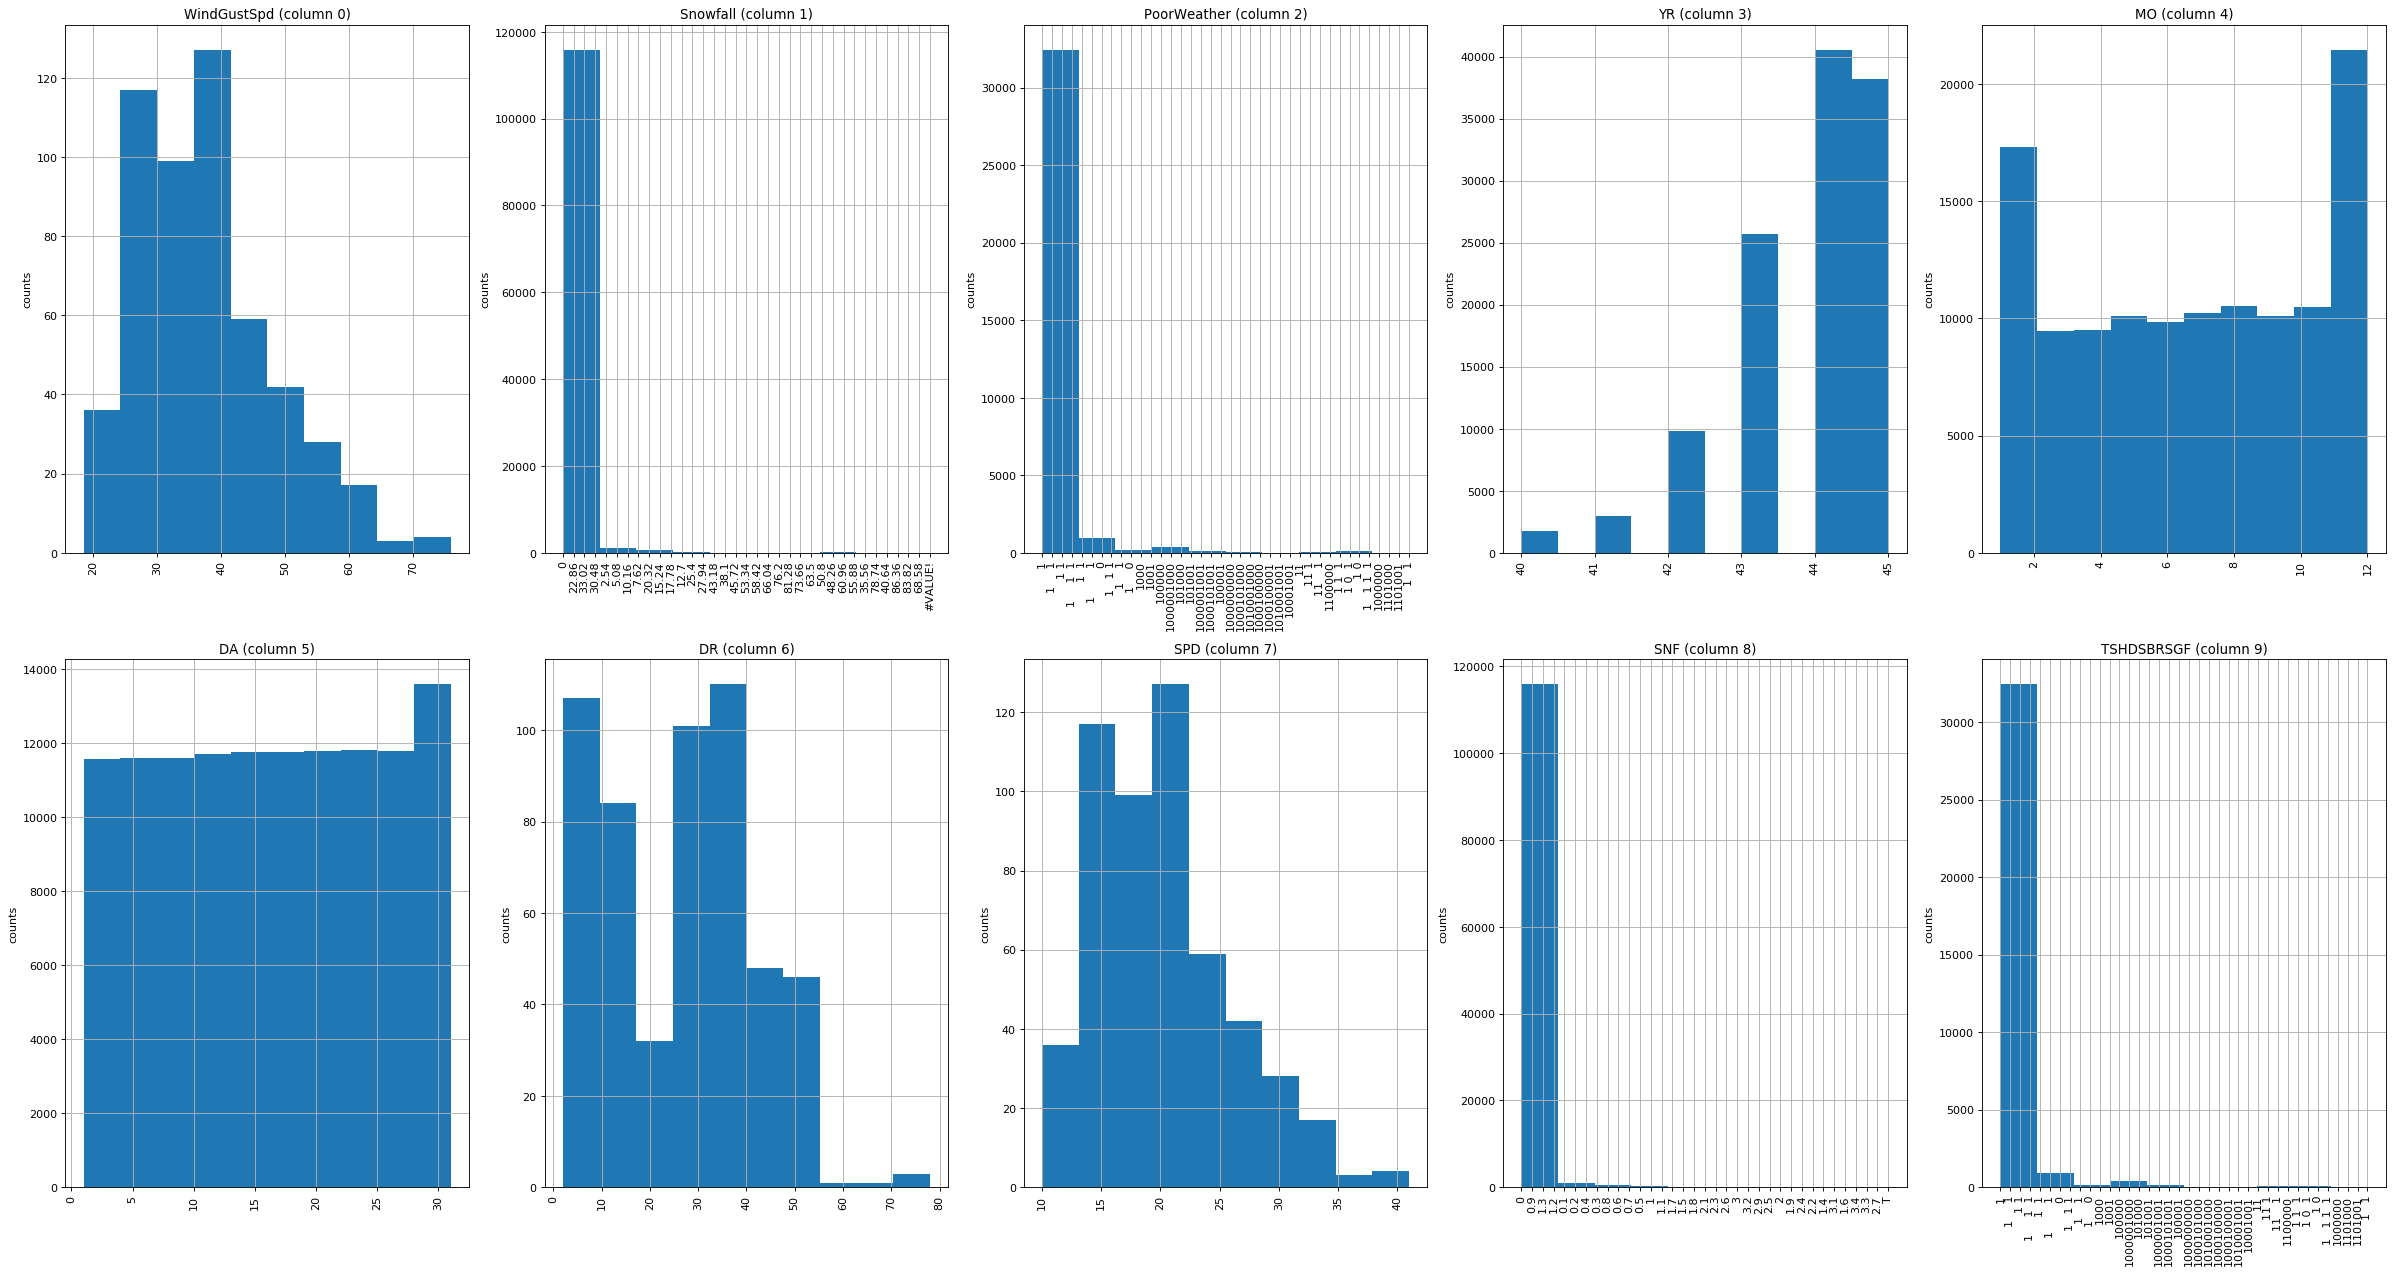

In [83]:
plotHistogram(data, 10, 5)

In [84]:
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth, name):
    df = df.dropna(axis='columns', how='all')  # Drop columns with all NaN values
    df = df.loc[:, df.apply(lambda x: x.nunique() > 1)]  # Keep columns with more than 1 unique value
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {name}', fontsize=15)
    plt.show()


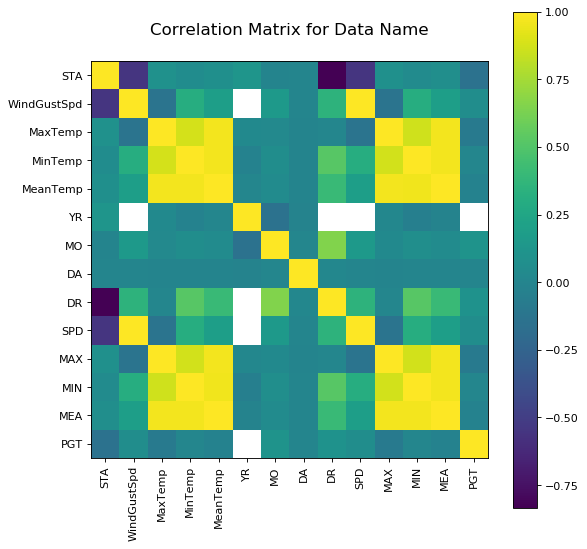

In [85]:
plotCorrelationMatrix(data, 8, 'Data Name')

In [86]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

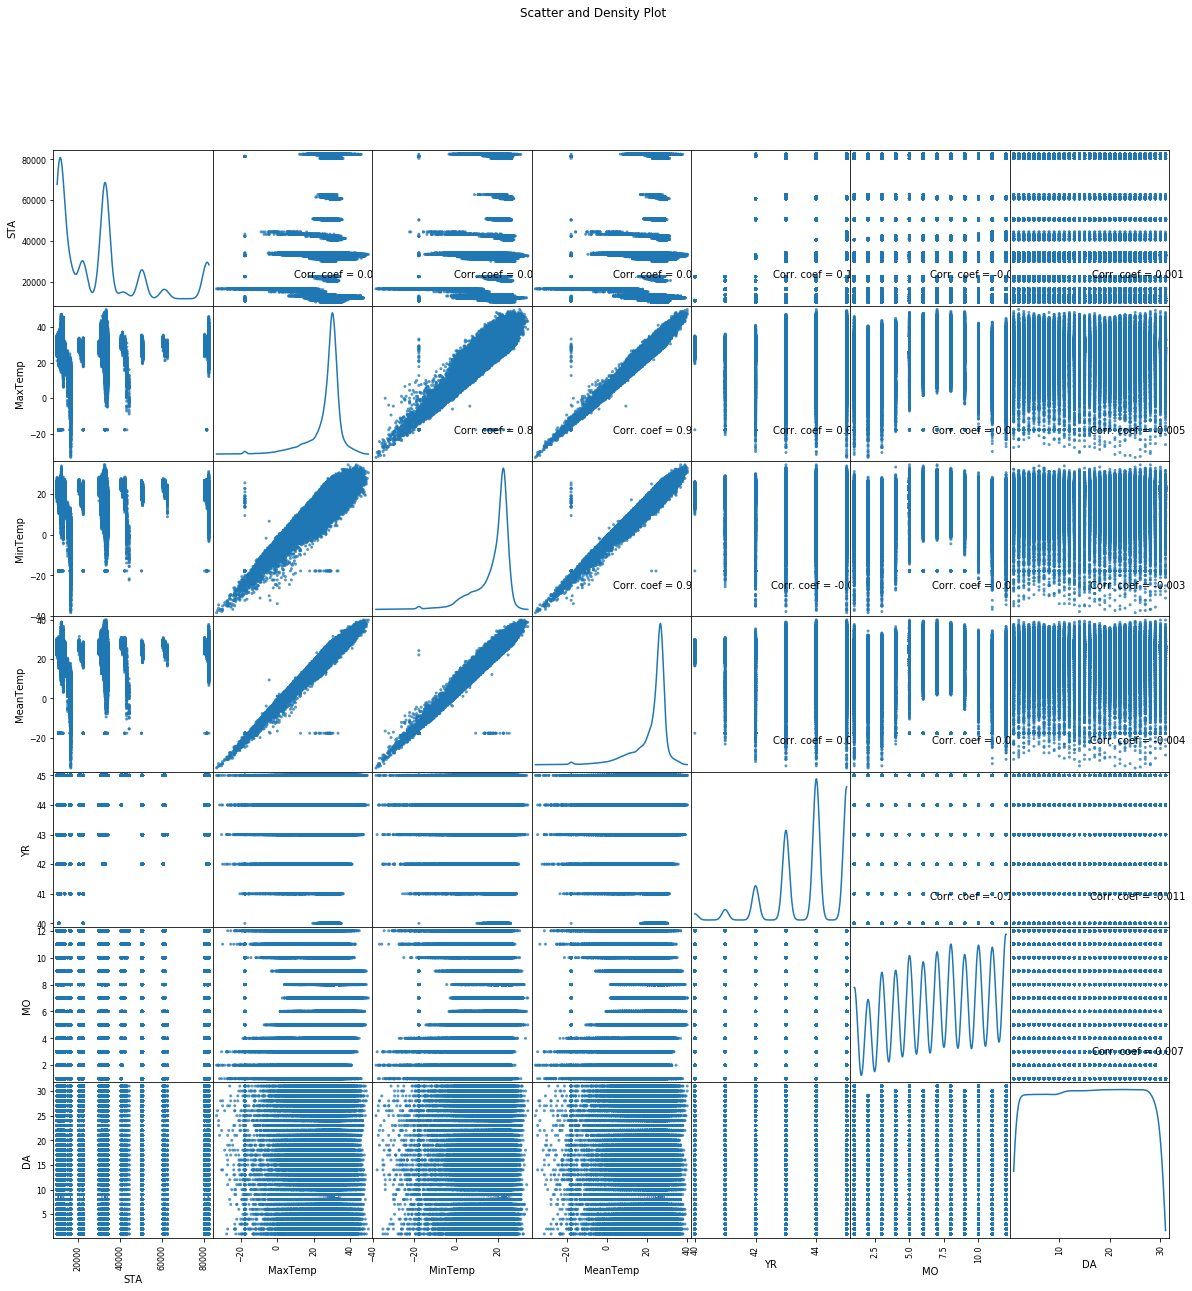

In [87]:
plotScatterMatrix(data, 20, 10)